In [46]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
agua = pd.read_csv("data_consumo_agua.csv")

### ¿Hay más consumo total de agua para uso doméstico o para el no doméstico? ¿Entre las alcaldías es clara esta diferencia?

In [68]:
dom_no = pd.DataFrame(agua,columns=['alcaldia','consumo_total_dom','consumo_total_no_dom'])\
.groupby(['alcaldia'], as_index=False).sum()\
.sort_values(by=['consumo_total_dom'], ascending=False)\
.melt(id_vars='alcaldia')\


<AxesSubplot:xlabel='value', ylabel='alcaldia'>

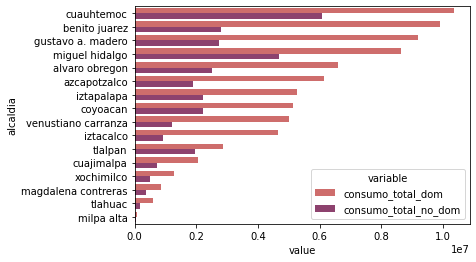

In [92]:
sns.barplot(x="value", y="alcaldia", data=dom_no, hue = 'variable',palette="flare")

Es claro que existe un mayor consumo de agua para el uso doméstico y que en la mayoría de los casos el no doméstico se encuentra al rededor de la mitad o menos.

Las alcaldías que lideran el consumo de agua de uso doméstico son la Cuauhtémoc, Benito Juárez y Gustavo A. Madero.

Para el consumo no doméstico tenemos a la Cuauhtémoc, Miguel Hidalgo y Benito Juárez.

Podemos cuestionarnos la definición exacta de uso doméstico o qué engloba pues si se incluyen las oficinas o corporativos en el uso no doméstico tiene sentido que la delegación Miguel Hidalgo esté en el top 3 pues ahí se concentran la mayoría de éstos.

### ¿Cuál es el comportamiento del índice de desarrollo de acuerdo al consumo de agua que tiene cada alcaldía?

In [97]:
ind_alcaldia = pd.DataFrame(agua, columns=['alcaldia','consumo_total','indice_des'])\
.groupby(['alcaldia','indice_des'], as_index=False).sum()\
.sort_values(by=['consumo_total'], ascending=False)

/home/yusuri/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


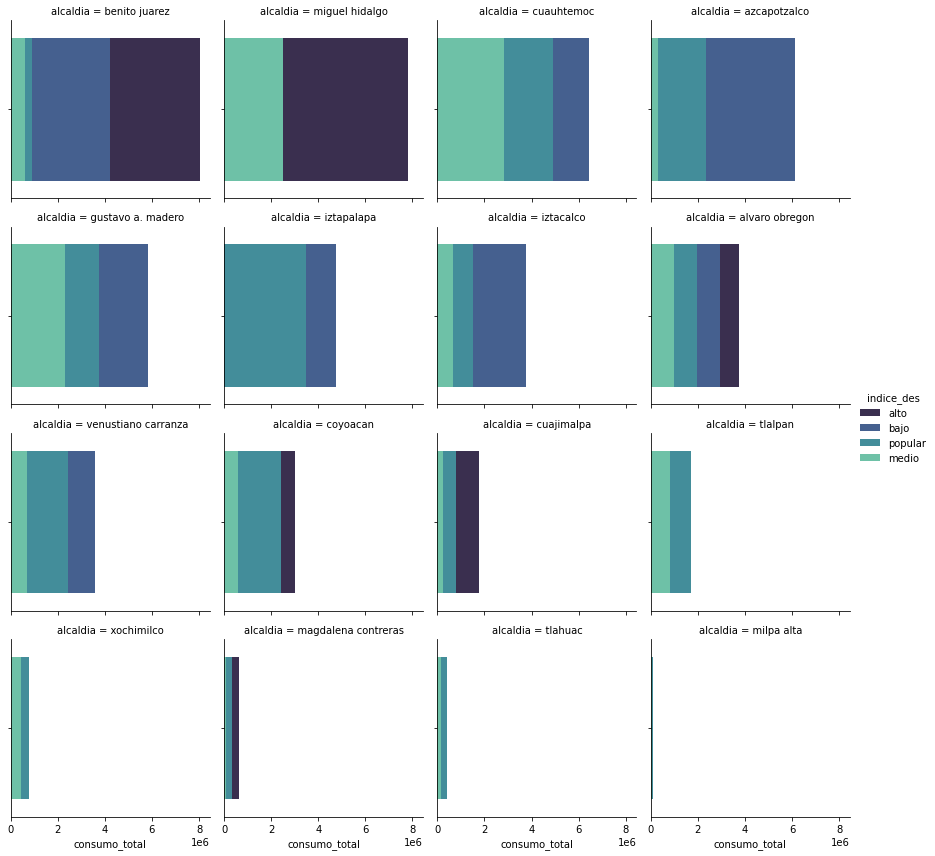

In [96]:
g=sns.FacetGrid(ind_alcaldia,col="alcaldia", col_wrap=4, hue="indice_des", palette="mako")
g.map(sns.barplot,"consumo_total")
g.add_legend()

Podemos ver que las dos alcaldías que tienen el mayor consumo total de agua, en este caso la Benito Juárez y Miguel Hidalgo tienen en común que el índice de desarrollo alto lidera su consumo.

En las demás alcaldías no hay un patrón claro que podamos encontrar en el consumo de agua y el índice de desarrollo. Aunque es interesante que en la Benito Juárez el consumo tenga una proporción muy similar entre el índice de desarrollo alto y bajo, dejando al medio con una proporción mínima, en contraste con la Miguel Hidalgo en la que tiene sentido que haya más consumo de agua de la población con un índice de desarrollo alto seguido del medio sin incluir el bajo y popular, ya que esta zona se caracteriza por tener los mejores servicios. Pensando de la misma forma en el tema de servicios o clase social encontramos que para la alcladía de Iztapalapa lidera su consumo con el índice de desarrollo popular seguido del bajo sin tomar el medio ni alto.

Otra cosa a destacar es que la proporción del índice de desarrollo respecto al consumo de agua en la alcaldía Álvaro Obregón es la más equilibrada. 


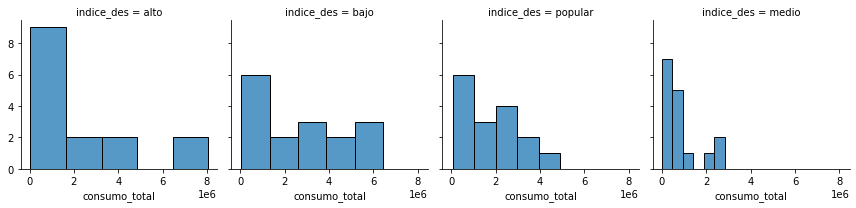

In [54]:
g=sns.FacetGrid(ind_alcaldia, col="indice_des")
g.map(sns.histplot, "consumo_total")

In [50]:
ind_alcaldia2 = agua.groupby(['alcaldia','indice_des'], as_index=False)['consumo_total'].sum()\
.rename(columns={'consumo_total':'count'}).sort_values(by=['count'])

In [13]:
ind_alcaldia2

,alcaldia,indice_des,count
34,iztapalapa,medio,226.68
45,milpa alta,medio,35692.69
32,iztapalapa,alto,44178.68
47,tlahuac,alto,44911.35
44,milpa alta,bajo,47414.48
...,...,...,...
25,gustavo a. madero,bajo,5839095.84
5,azcapotzalco,bajo,6119398.30
21,cuauhtemoc,bajo,6430251.23
40,miguel hidalgo,alto,7828405.06


<AxesSubplot:xlabel='count', ylabel='indice_des'>

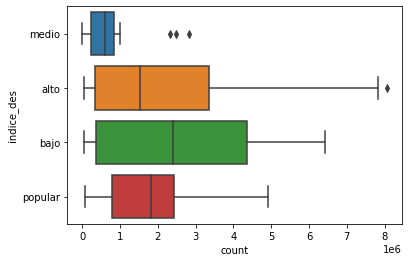

In [14]:
sns.boxplot(x="count", y="indice_des", data=ind_alcaldia2)